# Verify working directory & import necessary libraries

In [2]:
import os

notebook_path = os.getcwd()
print(notebook_path)

/Users/jae


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

In [4]:
!pip install pandadoc-python-client 
import pandadoc_client

In [5]:
# set the style of the plots
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (14, 8)
plt.rcParams["font.size"] = 12

In [6]:
# read in Excel file
df = pd.read_excel('/Users/jae/Documents/Sample Data.xlsx')

---

# Preliminary data validation steps

- Check to see if modified Excel sheet containing data loads in columns correctly.
- Check for missing values in any of the columns and return columns that have missing values.

In [7]:
# column name validation
print("Columns in the dataset: \n", df.columns.tolist())

Columns in the dataset: 
 ['Year', 'Quarter', 'Client Channel', 'Client', 'Account', 'Sales Person', 'Account Category', 'Product', 'Revenue']


In [8]:
# are the rows correctly loaded in?
print("First few rows of the dataset: \n")
print(df.head())

First few rows of the dataset: 

        Year  Quarter   Client Channel                      Client    Account  \
0 2020-01-01  Q1 2020      Independent    Aether Digital Solutions  Account 1   
1 2021-01-01  Q2 2021           Direct          Evergreen Organics  Account 2   
2 2021-01-01  Q2 2021      Independent          Binary Bloom Media  Account 3   
3 2021-01-01  Q2 2021      Independent  Capital Growth Investments  Account 4   
4 2021-01-01  Q3 2021  Holding Company           Global Data Nexus  Account 5   

    Sales Person       Account Category      Product  Revenue  
0     John Smith             Technology  Advanced TV   6117.4  
1     John Smith             Technology  Advanced TV  11470.1  
2    Sarah Jones     Marketing Services  Performance   1488.3  
3  Michael Brown  Media & Entertainment  Advanced TV    777.5  
4    Emily Davis                 Retail  Advanced TV  21491.7  


In [9]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # are there missing values if so, provide the columns as a series

Series([], dtype: int64)


---

# Quarterly revenue analysis

In [10]:
quarterly_revenue = df.groupby('Quarter')['Revenue'].sum().reset_index()

In [11]:
# sort by year and quarter in-order
def extract_year_quarter(quarter_str):
    # extract the quarter number and year from strings like 'Q1 2020'
    parts = quarter_str.split()
    if len(parts) == 2:
        q_num = int(parts[0][1])  # extract number after 'Q'
        year = int(parts[1])
        return year * 10 + q_num  # when sorting: 2020 Q1 = 20201, etc.
    return 0

In [12]:
# define a sorting key, sort_key and use function .sort_values()
quarterly_revenue['sort_key'] = quarterly_revenue['Quarter'].apply(extract_year_quarter)
quarterly_revenue = quarterly_revenue.sort_values('sort_key')

In [13]:
# remove the sorting key as it's no longer needed
quarterly_revenue = quarterly_revenue[['Quarter', 'Revenue']]

In [14]:
# display the sorted quarterly revenue
print("Quarterly Revenue Totals: \n")
print(quarterly_revenue)

Quarterly Revenue Totals: 

    Quarter    Revenue
0   Q1 2020  2635690.3
3   Q2 2020  2427231.5
6   Q3 2020  2566433.3
9   Q4 2020  4412076.4
1   Q1 2021  3254024.6
4   Q2 2021  4714776.0
7   Q3 2021  3740638.9
10  Q4 2021  5277683.5
2   Q1 2022  3657615.4
5   Q2 2022  2891828.1
8   Q3 2022  3213222.1
11  Q4 2022  4578913.5


---

# Quarterly revenue trend visual

- Identify revenue trend and depict linear line showing growth or decay.

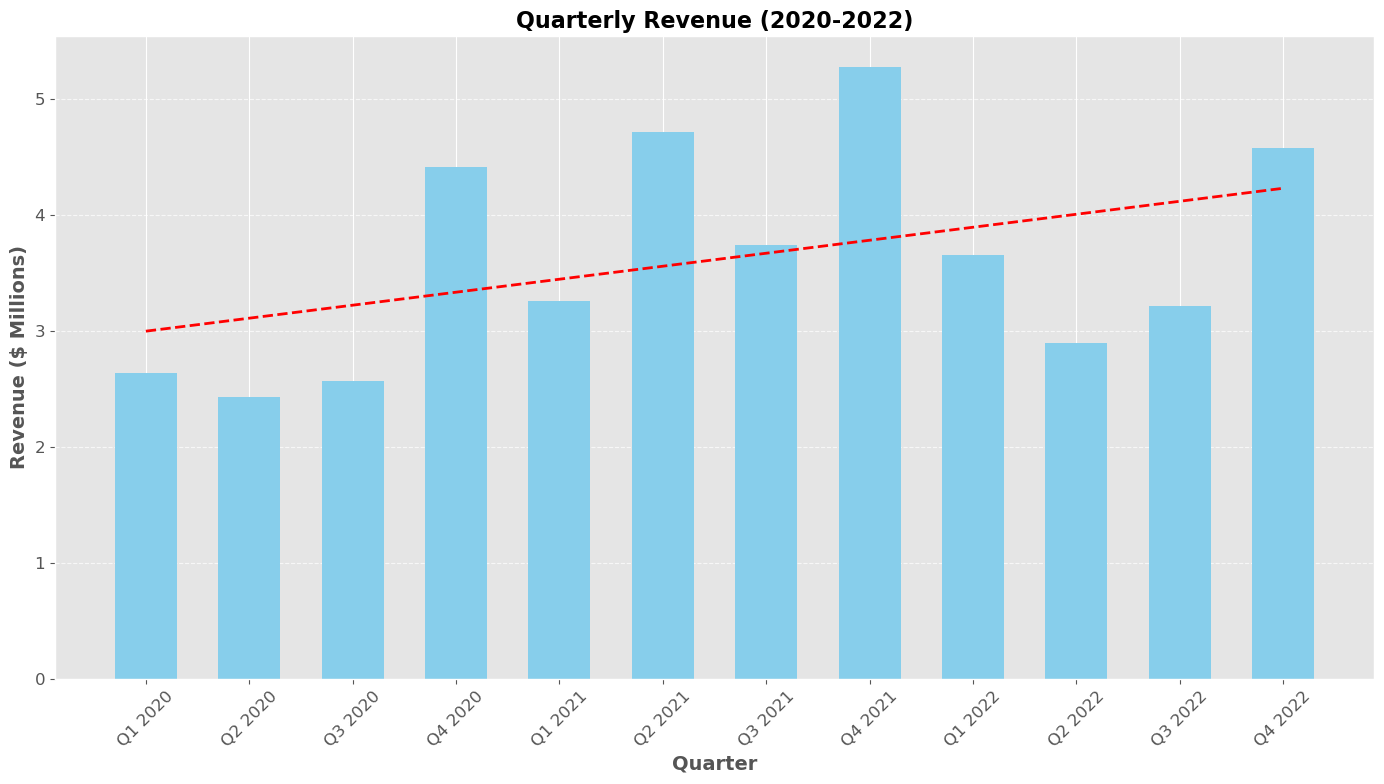

In [16]:
# create figure
plt.figure(figsize = (14, 8), dpi = 100)
plt.xlabel('Quarter', fontsize = 14, fontweight = 'bold')
plt.ylabel('Revenue ($ Millions)', fontsize = 14, fontweight = 'bold')
plt.title('Quarterly Revenue (2020-2022)', fontsize = 16, fontweight = 'bold')

# create bar chart for quarterly revenue
bars = plt.bar(quarterly_revenue['Quarter'], quarterly_revenue['Revenue'] / 1000000, color = 'skyblue', width = 0.6)

# set x-axis
plt.xticks(range(len(quarterly_revenue['Quarter'])), quarterly_revenue['Quarter'], rotation = 45)

# add simple trend line
x = np.arange(len(quarterly_revenue))
z = np.polyfit(x, quarterly_revenue['Revenue'] / 1000000, 1) # divide values by 1,000,000 instead of default sci notation
# polyfit() calculates coefficients for best-fit line slope + intercept and p(x) is the application of the polynomial function to every y-value
p = np.poly1d(z)
quarterly_visual = plt.plot(x, p(x), "r--", linewidth = 2)

# add grid background
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

plt.tight_layout()

plt.savefig('/Users/jae/Documents/quarterly_revenue')

In [16]:
# calculate the mean() or average revenue per quarter
avg_revenue = quarterly_revenue['Revenue'].mean()
print(f'\nAverage Quarterly Revenue: ${avg_revenue / 1000000:.2f}M')

# calculate the growth_rate by calculating absolute change in revenue and then divide by starting revenue to get relative change/growth rate
growth_rate = (quarterly_revenue['Revenue'].iloc[-1] - quarterly_revenue['Revenue'].iloc[0]) / quarterly_revenue['Revenue'].iloc[0] * 100
print(f'Overall Growth Rate from {quarterly_revenue['Quarter'].iloc[0]} to {quarterly_revenue['Quarter'].iloc[-1]}: {growth_rate:.2f}%')


Average Quarterly Revenue: $3.61M
Overall Growth Rate from Q1 2020 to Q4 2022: 73.73%


---

# Top 5 highest-valued accounts and product mix

- Identify the Top 5 highest-valued accounts and the product mix that contributes to their total revenue.

In [19]:
# get the top 5 accounts by revenue
top_accounts = df.groupby('Account')['Revenue'].sum().nlargest(5).index.tolist()
print(f'These are the Top 5 Accounts by Revenue: {top_accounts}\n')

# create a filtered dataframe using the Top 5 Accounts
filtered_data = df[df['Account'].isin(top_accounts)]
print(filtered_data.head())

These are the Top 5 Accounts by Revenue: ['Account 62', 'Account 76', 'Account 30', 'Account 27', 'Account 74']

         Year  Quarter   Client Channel                         Client  \
26 2021-01-01  Q4 2021  Holding Company  Advanced Analytics Collective   
30 2022-01-01  Q3 2022           Direct               Luxe Home Living   
48 2021-01-01  Q3 2021  Holding Company  Advanced Analytics Collective   
53 2021-01-01  Q3 2021  Holding Company  Advanced Analytics Collective   
62 2021-01-01  Q3 2021      Independent               Luxe Home Living   

       Account           Sales Person Account Category               Product  \
26  Account 27        Amanda Anderson       Technology  High Impact Branding   
30  Account 30  Christopher Rodriguez       Technology        Time and Place   
48  Account 27        Amanda Anderson       Technology           Advanced TV   
53  Account 27        Amanda Anderson       Technology  High Impact Branding   
62  Account 30  Christopher Rodriguez     

In [20]:
# pivot table of revenue by account and product
pivot_data = pd.pivot_table(
    filtered_data, 
    values = 'Revenue', 
    index = 'Account', 
    columns = 'Product', 
    aggfunc = 'sum',
    fill_value=0
)

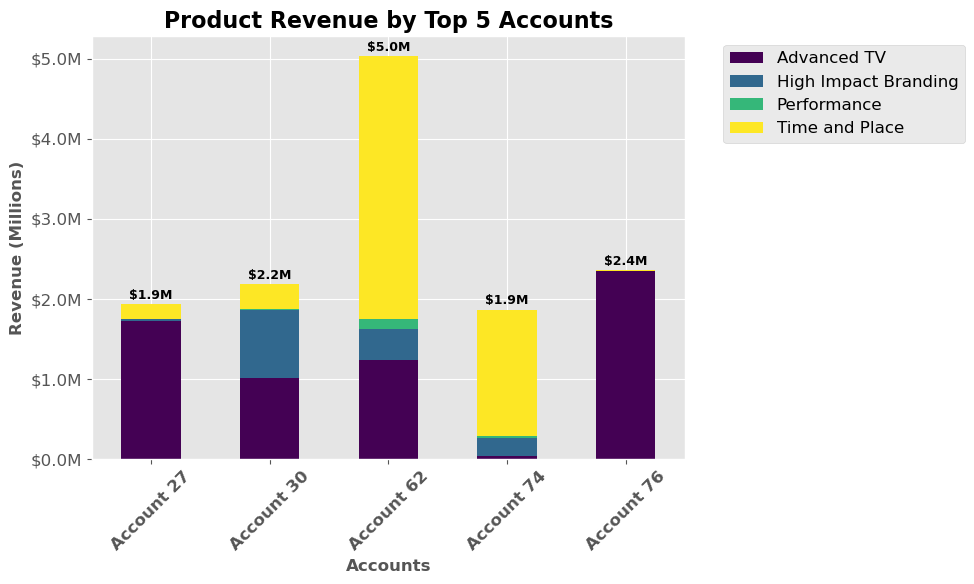

In [22]:
# stacked bar chart to visualize pivot_data
ax = pivot_data.plot(
    kind = 'bar', 
    stacked = True, 
    figsize = (10, 6), 
    colormap = 'viridis'
)

# reusable format function for y-axis instead of manually converting to millions
def millions_formatter(x, pos):
    return f'${x/1000000:.1f}M'

# Apply the formatter to the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# title, x-label, y-label, and legend
plt.title('Product Revenue by Top 5 Accounts', fontsize = 16, fontweight = 'bold')
plt.xlabel('Accounts', fontsize = 12, fontweight = 'bold')
plt.xticks(fontweight = 'bold', rotation = 45)
plt.ylabel('Revenue (Millions)', fontsize = 12, fontweight = 'bold')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')

# Add revenue totals on top of each bar
for i, account in enumerate(pivot_data.index):
    total = pivot_data.loc[account].sum()
    plt.text(i, total + (pivot_data.values.max() * 0.02), 
             f'${total / 1000000:.1f}M', 
             ha = 'center', fontsize = 9, fontweight= 'bold')

plt.tight_layout()
plt.savefig('/Users/jae/Documents/product_revenue')
plt.show()


In [20]:
print('Account 62 has the highest revenue (in Millions) where the product Time and Place contributes the most.')

Account 62 has the highest revenue (in Millions) where the product Time and Place contributes the most.


---

# Client Distribution Analysis

- Of the three client channels: `Independent`, `Direct`, and `Holding Company` calculate summary statistics using the `seaborn` library

In [21]:
# !python -m pip install seaborn

In [24]:
import seaborn as sns

In [28]:
# summary statistics
print(f'Total number of records: {len(df)}')

# what is the distribution  of the 3 client channels?
channel_counts = df['Client Channel'].value_counts()
print('\nClient Channel Distribution:')
print(channel_counts)

# average revenue by channel
channel_revenue = df.groupby('Client Channel')['Revenue'].agg(['mean', 'median', 'sum'])
channel_revenue['percentage'] = (channel_revenue['sum'] / channel_revenue['sum'].sum()) * 100
print('\nRevenue Statistics by Client Channel:')
print(channel_revenue)

Total number of records: 1585

Client Channel Distribution:
Client Channel
Independent        713
Holding Company    657
Direct             215
Name: count, dtype: int64

Revenue Statistics by Client Channel:
                         mean   median         sum  percentage
Client Channel                                                
Direct           30687.895349   7599.0   6597897.5   15.212998
Holding Company  34847.810502  14617.8  22895011.5   52.789811
Independent      19463.148107   5831.8  13877224.6   31.997191


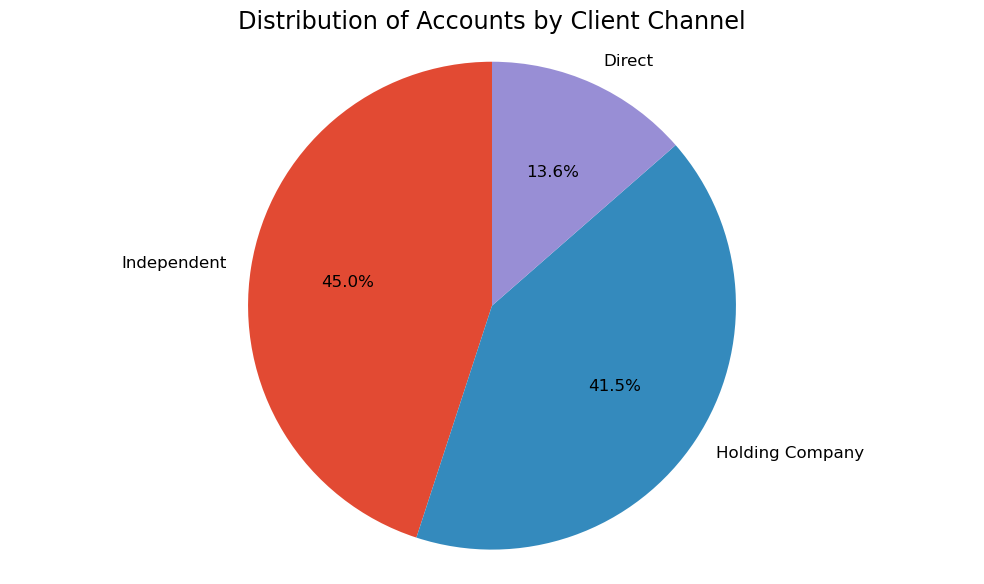

In [29]:
plt.figure(figsize = (10, 6))
plt.pie(channel_counts, labels = channel_counts.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Distribution of Accounts by Client Channel')
plt.axis('equal')  # change aspect ratio for circle
plt.tight_layout()
plt.savefig('/Users/jae/Documents/pie_chart')

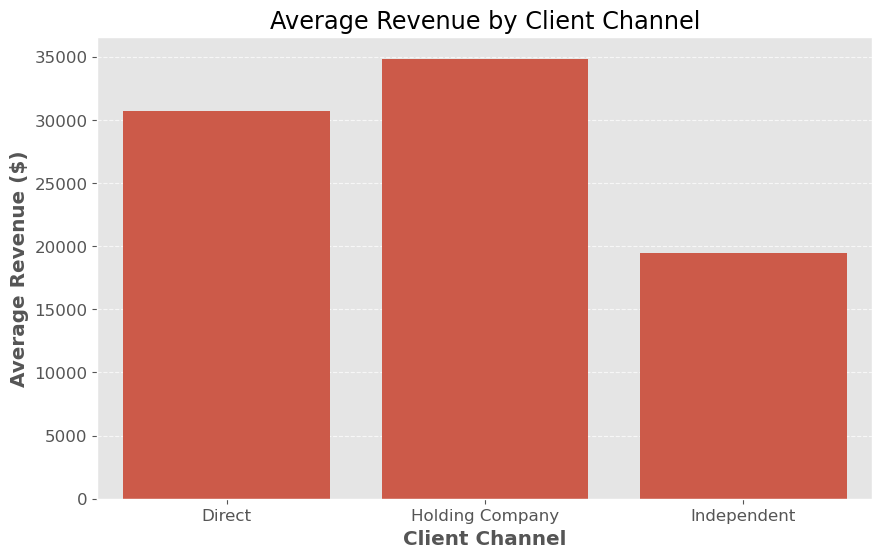

In [25]:
plt.figure(figsize = (10, 6))
sns.barplot(x = channel_revenue.index, y = channel_revenue['mean'])
plt.title('Average Revenue by Client Channel')
plt.xlabel('Client Channel', fontweight = 'bold')
plt.ylabel('Average Revenue ($)', fontweight = 'bold')
plt.xticks(rotation = 0)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

<Figure size 1400x700 with 0 Axes>

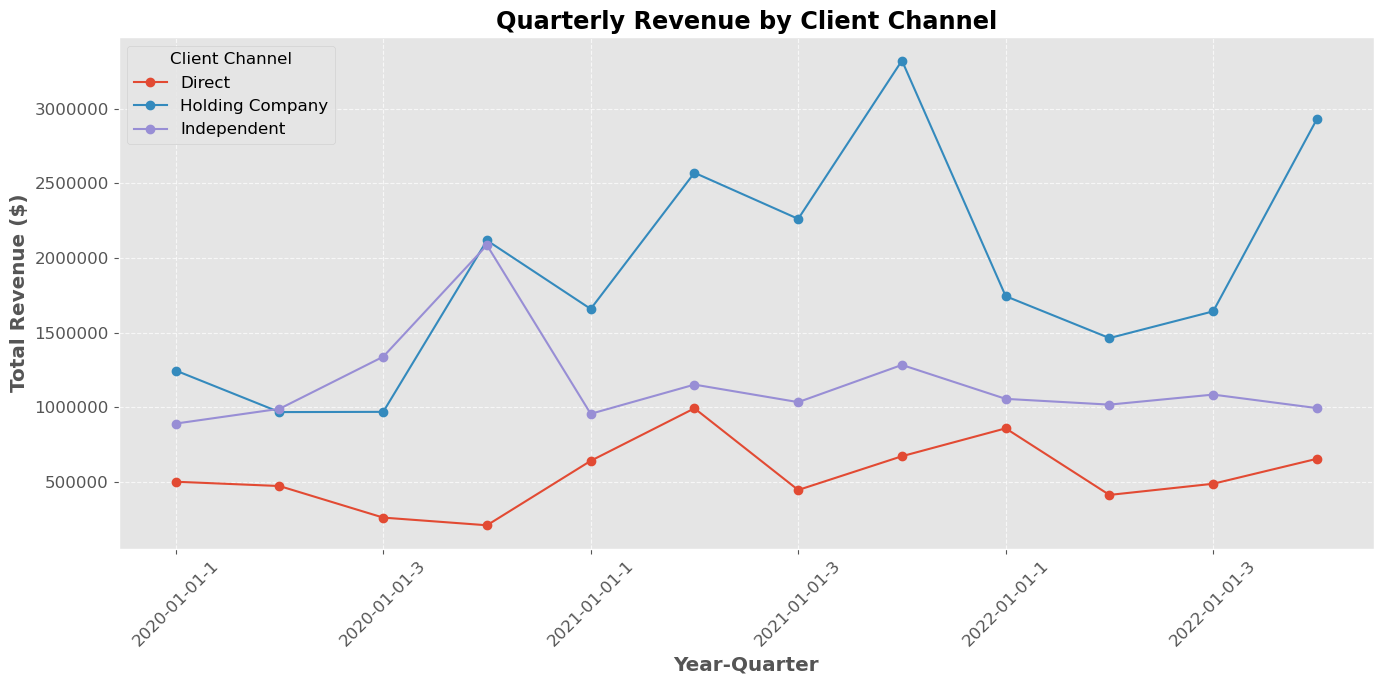

In [26]:
if 'Quarter' in df.columns:
    # Create a new column combining year and quarter for proper ordering
    df['Year_Quarter'] = df['Year'].astype(str) + '-' + df['Quarter'].str.extract(r'Q(\d)')[0]
    
    plt.figure(figsize = (14, 7))
    
    # Group by year-quarter and client channel
    quarterly_revenue = df.groupby(['Year_Quarter', 'Client Channel'])['Revenue'].sum().reset_index()
    
    # Create the line plot
    pivot_data = quarterly_revenue.pivot(index = 'Year_Quarter', columns = 'Client Channel', values = 'Revenue')
    pivot_data.plot(kind = 'line', marker = 'o', figsize = (14, 7))
    
    plt.title('Quarterly Revenue by Client Channel', fontweight = 'bold')
    plt.xlabel('Year-Quarter', fontweight = 'bold')
    plt.ylabel('Total Revenue ($)', fontweight = 'bold')
    plt.grid(True, linestyle = '--', alpha = 0.7)
    plt.xticks(rotation = 45)
    # Format y-axis tick labels to include 2 decimal places
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{x:.0f}'))
    plt.tight_layout()

<Figure size 1400x700 with 0 Axes>

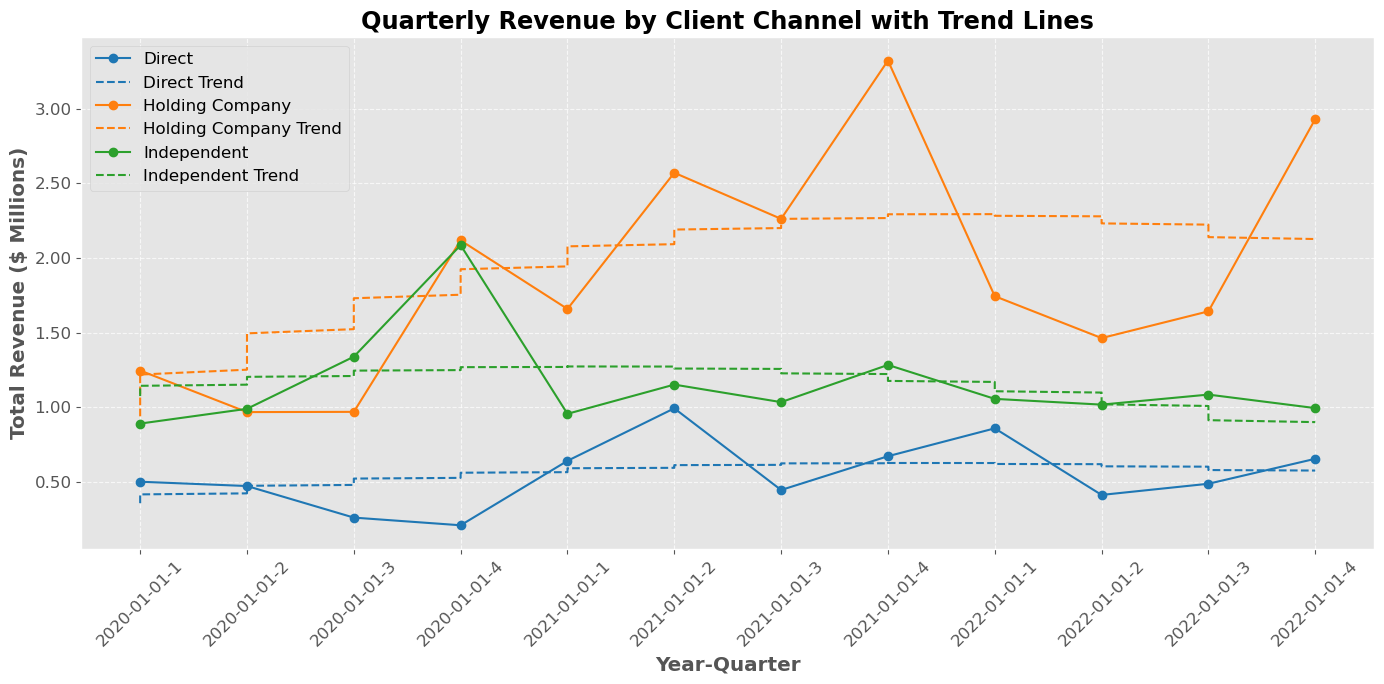

In [27]:
# using smoothed, moving average trend line, reusing same functionality above
if 'Quarter' in df.columns:
    
    df['Year_Quarter'] = df['Year'].astype(str) + '-' + df['Quarter'].str.extract(r'Q(\d)')[0]
    
    plt.figure(figsize = (14, 7))
    
    quarterly_revenue = df.groupby(['Year_Quarter', 'Client Channel'])['Revenue'].sum().reset_index()
    
    quarterly_revenue['Revenue_Millions'] = quarterly_revenue['Revenue'] / 1000000
    
    pivot_data = quarterly_revenue.pivot(index = 'Year_Quarter', columns = 'Client Channel', values = 'Revenue_Millions')
    
    # plotting channels separately to add trend lines later
    ax = plt.figure(figsize = (14, 7)).add_subplot(111)
    
    # what are the unique channels?
    channels = quarterly_revenue['Client Channel'].unique()
    
    colors = plt.cm.tab10(range(len(channels)))
    
    # enumerate each channel to get a different color
    for i, channel in enumerate(channels):
        # 'this channel'
        channel_data = quarterly_revenue[quarterly_revenue['Client Channel'] == channel]
        
        if len(channel_data) > 0:
            # sort by the 'Year_Quarter'
            channel_data = channel_data.sort_values('Year_Quarter')
            
            # plot data
            ax.plot(channel_data['Year_Quarter'], channel_data['Revenue_Millions'], 
                    marker = 'o', label = channel, color = colors[i])
            
            # exponential moving average/trend line
            if len(channel_data) >= 4: # 3 period moving average
                y = channel_data['Revenue_Millions'].values
                x = np.arange(len(y))
                
                # polyfit = 2 for smoother line
                z = np.polyfit(x, y, 2)
                p = np.poly1d(z)
                
                # smoothing with linspace()
                x_smooth = np.linspace(x.min(), x.max(), 100)
                y_smooth = p(x_smooth)
                
                x_positions = np.linspace(0, len(channel_data['Year_Quarter']) - 1, 100, dtype = int)
                x_labels = [channel_data['Year_Quarter'].iloc[min(i, len(channel_data) - 1)] for i in x_positions]
                
                # plt trend lines for each channel
                ax.plot(x_labels, y_smooth, '--', color = colors[i], linewidth = 1.5, 
                        label = f'{channel} Trend')
    
    plt.title('Quarterly Revenue by Client Channel with Trend Lines', fontweight = 'bold')
    plt.xlabel('Year-Quarter', fontweight = 'bold')
    plt.ylabel('Total Revenue ($ Millions)', fontweight = 'bold')
    plt.grid(True, linestyle = '--', alpha = 0.7)
    plt.xticks(rotation = 45)
    
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{x:.2f}'))
    
    plt.legend()
    
    plt.tight_layout()

    plt.savefig('/Users/jae/Documents/quarterly_client_revenue')